In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix



In [13]:
df = pd.read_csv(r"C:\Users\fatim\Desktop\Dataset\creditcard.csv")  
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Dataset shape: (284807, 31)
Number of fraudulent transactions: 492
Number of normal transactions: 284315


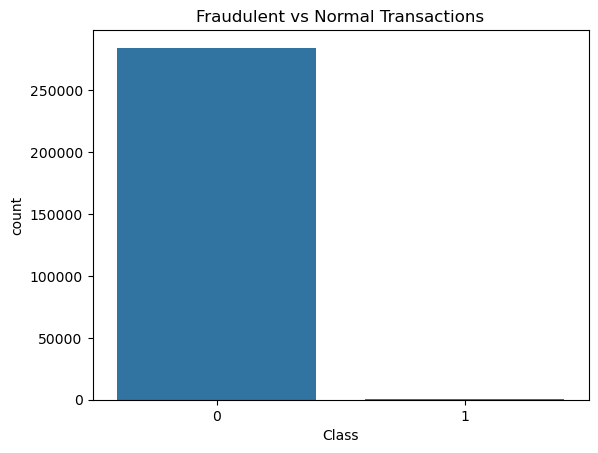

In [14]:
print("Dataset shape:", df.shape)
print("Number of fraudulent transactions:", df[df['Class'] == 1].shape[0])
print("Number of normal transactions:", df[df['Class'] == 0].shape[0])
sns.countplot(data=df, x='Class')
plt.title("Fraudulent vs Normal Transactions")
plt.show()


In [25]:
if 'Time' in df.columns:
    df = df.drop(['Time'], axis=1)
from sklearn.preprocessing import StandardScaler
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])


In [26]:
X = df.drop(['Class'], axis=1)
y = df['Class']


In [27]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
iso_forest.fit(X)

# Predict: -1 = anomaly (fraud), 1 = normal
y_pred = iso_forest.predict(X)
y_pred = [1 if x == -1 else 0 for x in y_pred]  # Convert to 1=fraud, 0=normal


Confusion Matrix:


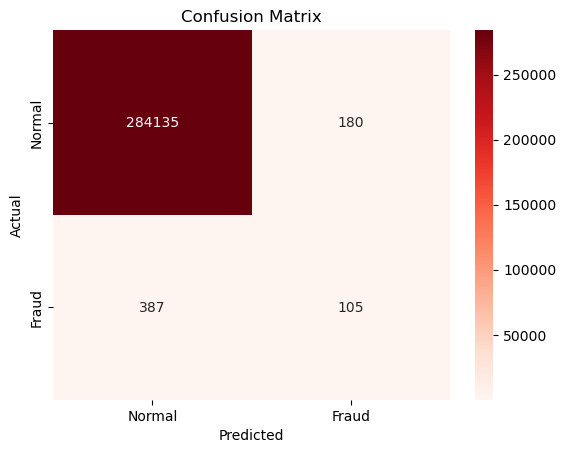


Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    284315
       Fraud       0.37      0.21      0.27       492

    accuracy                           1.00    284807
   macro avg       0.68      0.61      0.63    284807
weighted avg       1.00      1.00      1.00    284807



In [28]:
print("Confusion Matrix:")
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=["Normal", "Fraud"]))


In [29]:
# Show detected frauds
fraud_cases = df[(y == 0) & (np.array(y_pred) == 1)]
print("False Positives (Normal classified as Fraud):", fraud_cases.shape[0])

correctly_detected_fraud = df[(y == 1) & (np.array(y_pred) == 1)]
print("Correctly detected frauds:", correctly_detected_fraud.shape[0])


False Positives (Normal classified as Fraud): 180
Correctly detected frauds: 105
